In [5]:
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

import keras.models as models
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape, Permute
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Deconvolution2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Merge

from models_v1 import *
from models_v0 import *
from models_vae import *

%matplotlib inline

## Utility functions and global variables

In [2]:
train_path = '../Data/inpainting/train2014/'
val_path = '../Data/inpainting/val2014/'

In [3]:
# Utility function for loading data
def load_data(path, filenames, nb_images=None):
    if nb_images == None:
        nb_images == len(filenames)

    images_list = [mpimg.imread(path + fn).transpose(2, 0, 1) for fn in filenames[0:nb_images]]

    return np.array(images_list)

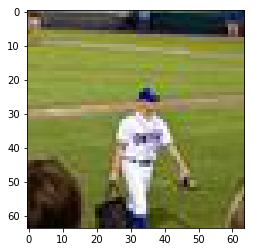

In [23]:
# Load data

# Train images
# Load valid train images filenames
with open("./Data/train_images_fn.pkl", 'rb') as input:
    train_fn = pickle.load(input)

# Load python dict containing channel-wise means and stds
with open("./Data/train_meanStd_dict.pkl", 'rb') as input:
    train_meanStd_dict = pickle.load(input, encoding='latin1')

x_train = load_data(train_path, train_fn, 100)
y_train = x_train[:, :, 16:48, 16:48].copy()  

# Validation images    
# Load valid validation images filenames
with open("./Data/val_images_fn.pkl", 'rb') as input:
    val_fn = pickle.load(input)

# Load python dict containing channel-wise means and stds
with open("./Data/val_meanStd_dict.pkl", 'rb') as input:
    val_meanStd_dict = pickle.load(input, encoding='latin1')
    
x_val = load_data(val_path, val_fn, 100)
y_val = x_val[:, :, 16:48, 16:48].copy()

# Display 1 image
x_train[0].reshape((64,64,3))
plt.imshow(x_train[0].transpose(1, 2, 0))

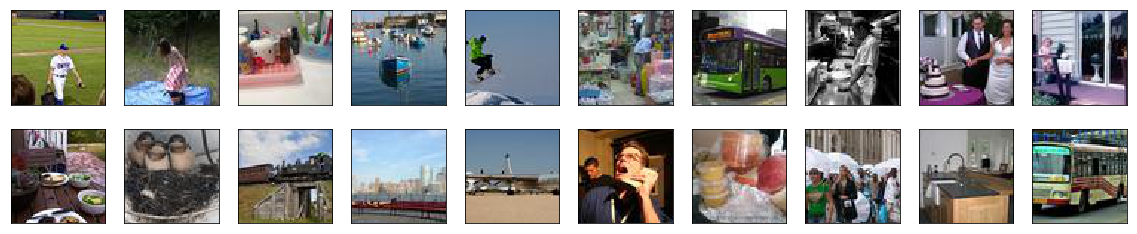

In [6]:
#Show reconstruction results on 10 images from training and validation
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_val[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Visualization

## Results visualization

### VAE

In [ ]:
vae, generator, encoder = model_vae_10(100, 1024)
generator.load_weights("./Results/Models_vae/generator_vae_01.h5")

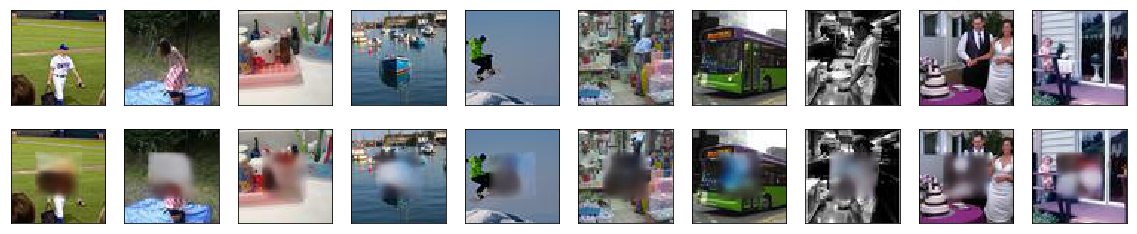

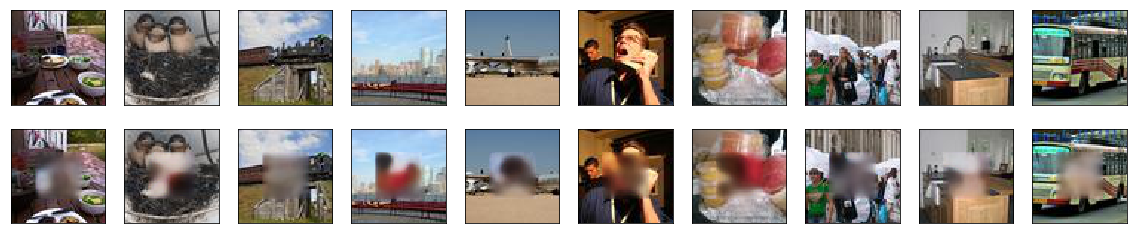

In [24]:
# Show reconstruction results on 10 images from training and validation
m = 100
n = 10

# Predict train and validation images centers


im_train = x_train[0:m].copy()/255.0
im_train[:, :, 16:48, 16:48] = 0.0
z = np.random.normal(0.0, 1.0, (m,512)).astype('float32')
im_train[:, :, 16:48, 16:48] = generator.predict([z, im_train])
im_train = (im_train * 255.0).astype('uint8')

im_val = x_val[0:m].copy()/255.0
im_val[:, :, 16:48, 16:48] = 0.0
z = np.random.normal(0.0, 1.0, (m,512)).astype('float32')
im_val[:, :, 16:48, 16:48] = generator.predict([z, im_val])
im_val = (im_val * 255.0).astype('uint8')

# Predict outputs of train and validation images
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(im_train[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(im_val[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Models v1

/Users/rudy_portugal/anaconda/lib/python3.6/site-packages/keras/engine/topology.py:1811: UserWarning: Model inputs must come from a Keras Input layer, they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "sequential_4_model" was not an Input tensor, it was generated by layer layer_2.
Note that input tensors are instantiated via `tensor = Input(shape)`.
The tensor that caused the issue was: layer_input_2
  str(x.name))


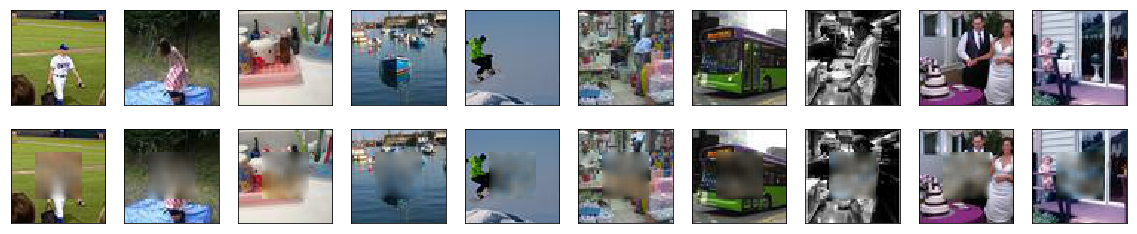

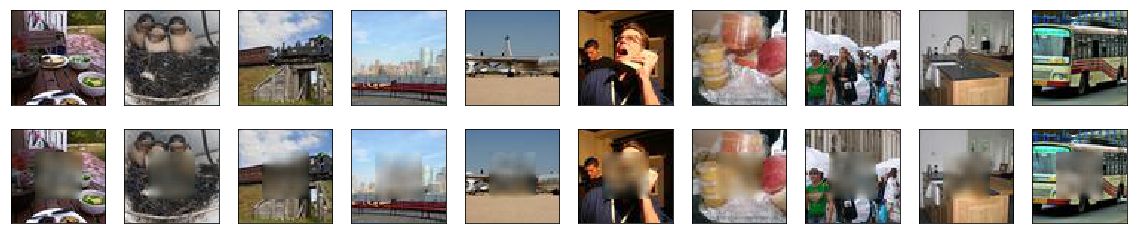

In [11]:
# Show reconstruction results on 10 images from training and validation
n = 10

# Predict train and validation images centers
model = model_v11()
model.load_weights("../Results/Models_v1/convautoencoder_v11.h5")

im_train = x_train[0:n].copy()/255.0
im_train[:, :, 16:48, 16:48] = 0.0
im_train[:, :, 16:48, 16:48] = model.predict(im_train)
im_train = (im_train * 255.0).astype('uint8')

im_val = x_val[0:n].copy()/255.0
im_val[:, :, 16:48, 16:48] = 0.0
im_val[:, :, 16:48, 16:48] = model.predict(im_val)
im_val = (im_val * 255.0).astype('uint8')

# Predict outputs of train and validation images
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(im_train[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(im_val[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## Training curves visualization

### VAE

### Models v1

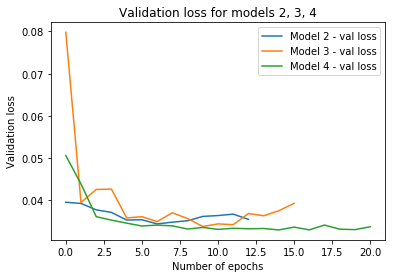

In [9]:
import matplotlib.ticker as ticker


with open("../Results/Models_v1/convautoencoder_v11_trainHistory.pkl", 'rb') as input:
    train_results_v01 = pickle.load(input, encoding='latin1')
    
with open("../Results/Models_v1/convautoencoder_v12_trainHistory.pkl", 'rb') as input:
    train_results_v02 = pickle.load(input, encoding='latin1')
    
with open("../Results/Models_v1/convautoencoder_v13_trainHistory.pkl", 'rb') as input:
    train_results_v03 = pickle.load(input, encoding='latin1')
    
"""plt.figure()
plt.plot(train_results_v01['loss'], label="Model 2 - train loss")
plt.plot(train_results_v02['loss'], label="Model 3 - train loss")
plt.plot(train_results_v03['loss'], label="Model 4 - train loss")
plt.title("Training loss for models 2, 3, 4")
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")
plt.legend()"""
    
plt.figure()
plt.plot(train_results_v01['val_loss'], label="Model 2 - val loss")
plt.plot(train_results_v02['val_loss'], label="Model 3 - val loss")
plt.plot(train_results_v03['val_loss'], label="Model 4 - val loss")
plt.title("Validation loss for models 2, 3, 4")
plt.xlabel("Number of epochs")
plt.ylabel("Validation loss")
plt.legend()

### Models v0

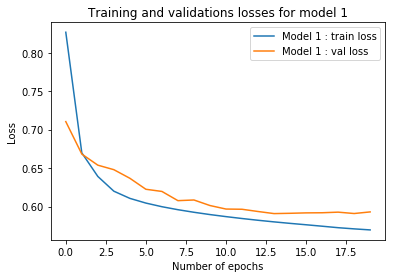

In [8]:
with open("./Results/Models_v0/convautoencoder_v041_trainHistory.pkl", 'rb') as input:
    train_results_v10 = pickle.load(input, encoding='latin1')
    
plt.figure()
plt.plot(train_results_v10['loss'], label="Model 1 : train loss")
plt.plot(train_results_v10['val_loss'], label="Model 1 : val loss")
plt.title("Training and validations losses for model 1")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()

In [5]:
def reconstruct_images(norm_x, x_fn, meanStd_dict):
    n_images = norm_x.shape[0]
    x = np.zeros(norm_x.shape)
    for i in range(n_images - 1):
        fn = x_fn[i]
        mean, std = meanStd_dict[fn]
        for k in range(3):
            x[i, k, :, :] = (norm_x[i, k, :, :] * std[2 - k]) + mean[2 - k]
    return x.astype('uint8')

def normalize_images(x, x_fn, meanStd_dict):
    n_images = x.shape[0]
    norm_x = np.zeros(x.shape)
    for i in range(n_images - 1):
        fn = x_fn[i]
        mean, std = meanStd_dict[fn]
        for k in range(3):
            norm_x[i, k, :, :] = (x[i, k, :, :] - mean[2 - k]) / std[2 - k]
    return norm_x

In [6]:
# Load python dict containing channel-wise means and stds
with open("./Data/train_meanStd_dict.pkl", 'rb') as input:
    train_meanStd_dict = pickle.load(input, encoding='latin1')

# Load python dict containing channel-wise means and stds
with open("./Data/val_meanStd_dict.pkl", 'rb') as input:
    val_meanStd_dict = pickle.load(input, encoding='latin1')

In [7]:
# Show reconstruction results on 10 images from training and validation
n = 10

# Predict train and validation images centers
model = model_v041()
model.summary()
model.load_weights("./Results/Models_v0/convautoencoder_v041.h5")

im_train = normalize_images(x_train[0:n], train_fn, train_meanStd_dict)
im_train[:, :, 16:48, 16:48] = 0.0
im_train[:, :, 16:48, 16:48] = model.predict(im_train[0:1])
im_train = reconstruct_images(im_train, train_fn, train_meanStd_dict)

im_val = normalize_images(x_val[0:n], val_fn, val_meanStd_dict)
im_val[:, :, 16:48, 16:48] = 0.0
im_val[:, :, 16:48, 16:48] = model.predict(im_val[0:1])
im_val = reconstruct_images(im_val, val_fn, val_meanStd_dict)

# Predict outputs of train and validation images
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(im_train[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(im_val[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

ValueError: Input 0 is incompatible with layer convolution2d_4: expected ndim=4, found ndim=5

In [16]:
im_train.shape

(10, 3, 64, 64)